# Try out for lab

In [12]:
# db = MySQLdb.connect("http://dolgi.informatik.rwth-aachen.de:3306","ldavlab_ruiming","bt8VTsGH7tsXt3BS","Lab_Visual" )
import MySQLdb
import numpy as np

# Connect with the MySQL Server
db = MySQLdb.connect(host='dolgi.informatik.rwth-aachen.de', port = 3306, user='ldavlab_ruiming',passwd='bt8VTsGH7tsXt3BS', db='ldavlab')


# prepare a cursor object using cursor() method
cursor = db.cursor()

# execute SQL query using execute() method.
cursor.execute("SELECT Bewertung, SpentTime/60  FROM    ldavlab_ruiming.etesttries_view where     etestnr = '1' and Status = 'Beendet' and SpentTime < 6000 group by Nachname")

# Fetch a single row using fetchone() method.
data = cursor.fetchall()

from sklearn import preprocessing
X = np.array(data)
data = preprocessing.scale(X)
# print (data)

db.close()

In [13]:
import pandas as pd
df = pd.DataFrame( [[ij for ij in i] for i in data] )
df.rename(columns={0: 'Grade', 1: 'Time'}, inplace=True);

In [14]:
df.head()

,Grade,Time
0,0.056812,-0.161181
1,-1.059977,-0.283062
2,0.087270,-0.759394
3,-0.125935,-0.408290
4,0.087270,2.298752


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
        Grade      Time
0    0.056812 -0.161181
1   -1.059977 -0.283062
2    0.087270 -0.759394
3   -0.125935 -0.408290
4    0.087270  2.298752
5    1.112686  0.300612
6   -2.120927 -0.692305
7    0.935015 -0.412765
8   -0.364522 -0.573779
9    0.148186 -0.634159
10  -0.278224 -0.259581
11   0.874099  0.066921
12   1.295434 -0.571545
13  -0.699559  0.245827
14  -0.125935 -0.725850
15  -0.034561 -0.536880
16  -0.156393 -0.761628
17   1.112686  1.822420
18   0.691352  0.341986
19   1.112686 -0.646457
20   1.295434 -0.833192
21  -0.364522  3.971502
22  -0.669101 -0.012465
23   1.295434 -0.554773
24   1.295434 -0.797407
25  -2.389972  0.251416
26   0.478147  1.144820
27   0.691352  0.254770
28   0.447689  0.000953
29  -2.450888 -0.418354
..        ...       ...
90   0.660894 -0.116453
91   0.508605 -0.486563
92  -0.278224 -0.290885
93   0.691352 -0.028124
94   0.874099 -0.673292
95  -0.938146  5.820925
96  -0.455895 

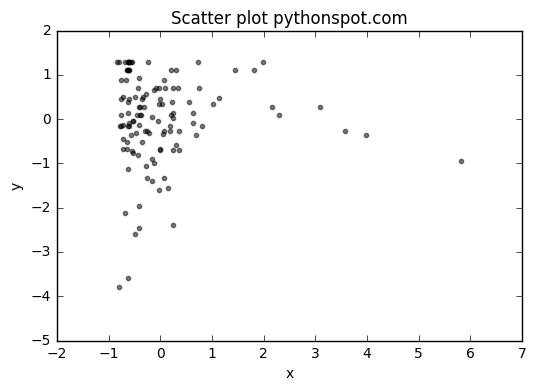

In [15]:
import numpy as np
import matplotlib.pyplot as plt
 
# Create data
x = df['Time']
y = df['Grade']

print(type(x))
print(type(df))
print(df)

colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
from scipy import cluster

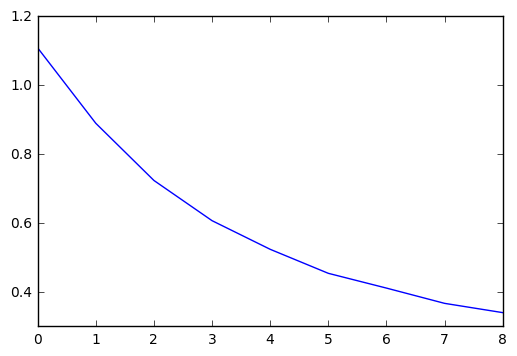

In [17]:
initial = [cluster.vq.kmeans(data,i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.show()

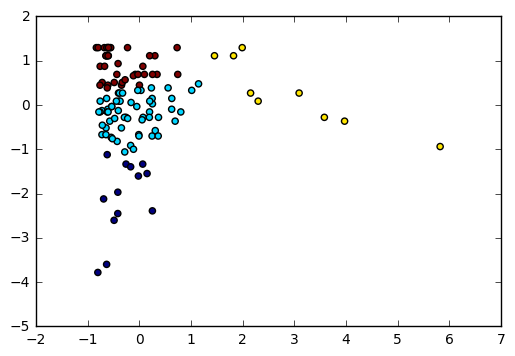

<class 'numpy.ndarray'>


In [18]:
cent, var = initial[3]
#use vq() to get as assignment for each obs.
assignment,cdist = cluster.vq.vq(data,cent)
plt.scatter(x, y, c=assignment)
plt.show()

print(type(assignment))

In [19]:
df = df.assign(Class=pd.Series(assignment).values)

In [20]:
dn = pd.DataFrame( [[ij for ij in i] for i in X] )
dn = dn.assign(Class=pd.Series(assignment).values)
print(dn)

         0         1  Class
0     7.56   10.9500      1
1     5.36    9.1333      1
2     7.62    2.0333      1
3     7.20    7.2667      1
4     7.62   47.6167      2
5     9.64   17.8333      3
6     3.27    3.0333      0
7     9.29    7.2000      3
8     6.73    4.8000      1
9     7.74    3.9000      1
10    6.90    9.4833      1
11    9.17   14.3500      3
12   10.00    4.8333      3
13    6.07   17.0167      1
14    7.20    2.5333      1
15    7.38    5.3500      1
16    7.14    2.0000      1
17    9.64   40.5167      2
18    8.81   18.4500      3
19    9.64    3.7167      3
20   10.00    0.9333      3
21    6.73   72.5500      2
22    6.13   13.1667      1
23   10.00    5.0833      3
24   10.00    1.4667      3
25    2.74   17.1000      0
26    8.39   30.4167      1
27    8.81   17.1500      3
28    8.33   13.3667      3
29    2.62    7.1167      0
..     ...       ...    ...
90    8.75   11.6167      3
91    8.45    6.1000      3
92    6.90    9.0167      1
93    8.81   12.9333

Now is the time for dealing with courses


In [40]:
import pickle
copyofdata = pickle.load( open( "coursetable_oct.p", "rb" ) )

In [41]:
copyofdata

{'4d0d1f82': ['16106218', '16101157', '16118623'],
 '574e4927': ['16100676', '16100844', '16206488', '16102517'],
 '4fc77268': ['16102276', '16124618', '16101893', '16124595'],
 '02f7f2cd': ['16203896',
  '15106038',
  '16125039',
  '16112448',
  '16119051',
  '16112532',
  '16112219'],
 '863d4785': ['16101906', '16137646'],
 'b2090bfa': ['16205893'],
 '4d0b3579': ['16108468'],
 '89e2a439': ['16112377',
  '16112379',
  '16149965',
  '16239448',
  '16132383',
  '16102079',
  '16112065',
  '16131439',
  '16118660',
  '16106045',
  '16112420',
  '16130342',
  '16148197',
  '16124477',
  '16118482',
  '16150197'],
 '59000282': ['16123953', '16105539', '16102618', '16104641', '16105373'],
 '863d9f99': ['16103462', '16112009'],
 'd932b52d': ['16253564', '16149512'],
 '4db9e674': ['16150542'],
 'b00521ba': ['16101157'],
 '5cc9cef3': ['16112445'],
 '02f7f691': ['16201715'],
 '86828f9d': ['16103343', '16206941'],
 '5edc845b': ['16104213', '16112136'],
 '543bd36e': ['16105171',
  '16201515',
  '

In [42]:
listforfp = list(copyofdata.values())
dictsort = {}
for courses in listforfp:
    for cornum in courses:
        if cornum in dictsort:
            dictsort[cornum]+=1
        else:
            dictsort[cornum] = 1

import operator

sorted_dict = sorted(dictsort.items(), key=operator.itemgetter(1), reverse=True)
sorted_dict = sorted_dict[0:60]

In [43]:
sorted_dict

[('16137850', 6613),
 ('16110387', 6058),
 ('16106039', 5673),
 ('16104035', 4910),
 ('16100856', 4854),
 ('16102656', 4387),
 ('16102931', 4121),
 ('16206862', 3844),
 ('16104213', 3843),
 ('16112450', 3734),
 ('16104543', 3675),
 ('16104317', 3653),
 ('16112136', 3629),
 ('16105171', 3507),
 ('16100748', 3436),
 ('16103724', 3343),
 ('16102015', 3338),
 ('16100722', 3158),
 ('16104689', 3105),
 ('16106014', 3045),
 ('16104974', 2834),
 ('16112227', 2826),
 ('16102517', 2790),
 ('16101188', 2693),
 ('16108468', 2658),
 ('16118808', 2657),
 ('16100997', 2655),
 ('16106285', 2630),
 ('16205893', 2530),
 ('16104603', 2468),
 ('16101798', 2340),
 ('16105179', 2303),
 ('16109425', 2250),
 ('16150542', 2104),
 ('16102678', 2021),
 ('16220316', 1928),
 ('16106015', 1908),
 ('16119858', 1878),
 ('16101994', 1868),
 ('16102374', 1842),
 ('16115682', 1752),
 ('16100217', 1732),
 ('16236509', 1719),
 ('16139454', 1641),
 ('16151405', 1635),
 ('16108364', 1587),
 ('16103462', 1581),
 ('16102468',

In [44]:
def reconstruct(line):
    s = list(line)
    if s[2] == '1':
        s[2] = "ws-"
    else:
        s[2] = "ss-"

    line =  "".join(s)
    return line

In [26]:
import re
from collections import Counter
import pickle

WORDS = pickle.load( open( "germanwords.p", "rb" ) )

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'öäüÖÄÜßáóúéÁÓÚÉ'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    return set(replaces)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def correctionWord(word): 
    "Most probable spelling correction for word."
    return max(candidates(word.lower()), key=P)

def correctionStr(string):
    "Correction for a string with multiple words"
#     trimstr = re.sub("\s*\(.*\)\s*", "", string)
#     strarray = re.findall(r'[A-Z\?]?[a-z\?]+', string)
    strarray = re.findall(r'[A-Za-z0-9\?]+', string)

    for i, substring in enumerate(strarray):
        if "?" in substring:
            strarray[i] = correctionWord(substring)
    resultstr = " ".join(x for x in strarray)        
    return resultstr

In [45]:
import MySQLdb
import MySQLdb.cursors
jsondata = []

db = MySQLdb.connect(host='dolgi.informatik.rwth-aachen.de', port = 3306, user='ldavlab_ruiming',passwd='bt8VTsGH7tsXt3BS', db='ldavlab', cursorclass = MySQLdb.cursors.SSCursor)
cursor = db.cursor()

for item, value in sorted_dict:
    string = reconstruct(item)
    query = "SELECT CRTitle FROM ldavlab.courseRooms where LVNumber = '" + string + "' limit 1"
    cursor.execute(query)
    result = cursor.fetchone()
    if result is None:
        print(string)
        continue
    
    jsondata.append({"name":correctionStr(result[0]), "value":value})
    


cursor.close()
db.close()



    

16ws-50542
16ws-51405


In [46]:
jsondata

[{'name': 'höhere Mathematik I für Wirtschaftsingenieure und Maschinenbauer',
  'value': 6613},
 {'name': 'Internes Rechnungswesen und buchführung Rechnungswesen I A Lernraum zur Veranstaltung',
  'value': 6058},
 {'name': 'einführung in die Technische Informatik', 'value': 5673},
 {'name': 'Analysis für Informatiker', 'value': 4910},
 {'name': 'Physik für Maschinenbau', 'value': 4854},
 {'name': 'Mathematik I', 'value': 4387},
 {'name': 'höhere Mathematik 1', 'value': 4121},
 {'name': 'Maschinengestaltung II Vorlesung', 'value': 3844},
 {'name': 'Maschinengestaltung II', 'value': 3843},
 {'name': 'Werkstoffkunde I', 'value': 3734},
 {'name': 'Mechanik I für Maschinenbauer', 'value': 3675},
 {'name': 'Regelungstechnik Vorlesung', 'value': 3653},
 {'name': 'Lernraum Messtechnisches Labor', 'value': 3629},
 {'name': 'Mathematik III', 'value': 3507},
 {'name': 'grundzüge der Chemie', 'value': 3436},
 {'name': 'Thermodynamik II', 'value': 3343},
 {'name': 'höhere Mathematik 3', 'value': 33

In [48]:
len(jsondata)

58

In [47]:
import json
with open('wordcloud_oct.json', 'w',encoding='utf8') as outfile:
    json.dump(jsondata, outfile)